In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Generate random dataset
np.random.seed(42)
date_range = pd.date_range(start='01-01-2022', end='12-31-2022', freq='D')
admissions_mean = 100
noise = np.random.normal(0, 10, len(date_range))
weekend_boost = [15 if day in [5, 6] else 0 for day in date_range.dayofweek]  # more admissions during weekends
seasonality = 10 * np.sin(np.linspace(0, 2 * np.pi, len(date_range)))  # some seasonality
admissions = admissions_mean + noise + weekend_boost + seasonality

# Create DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'Day_of_Week': date_range.dayofweek,
    'Public_Holiday': [(1 if day.month == 12 and day.day in [25, 31] else 0) for day in date_range],  # Christmas & New Year
    'Admissions': admissions
})

# Display the first few rows of the generated dataset
df.head()



,Date,Day_of_Week,Public_Holiday,Admissions
0,2022-01-01,5,0,119.967142
1,2022-01-02,6,0,113.789963
2,2022-01-03,0,0,106.822047
3,2022-01-04,1,0,115.747912
4,2022-01-05,2,0,98.348378


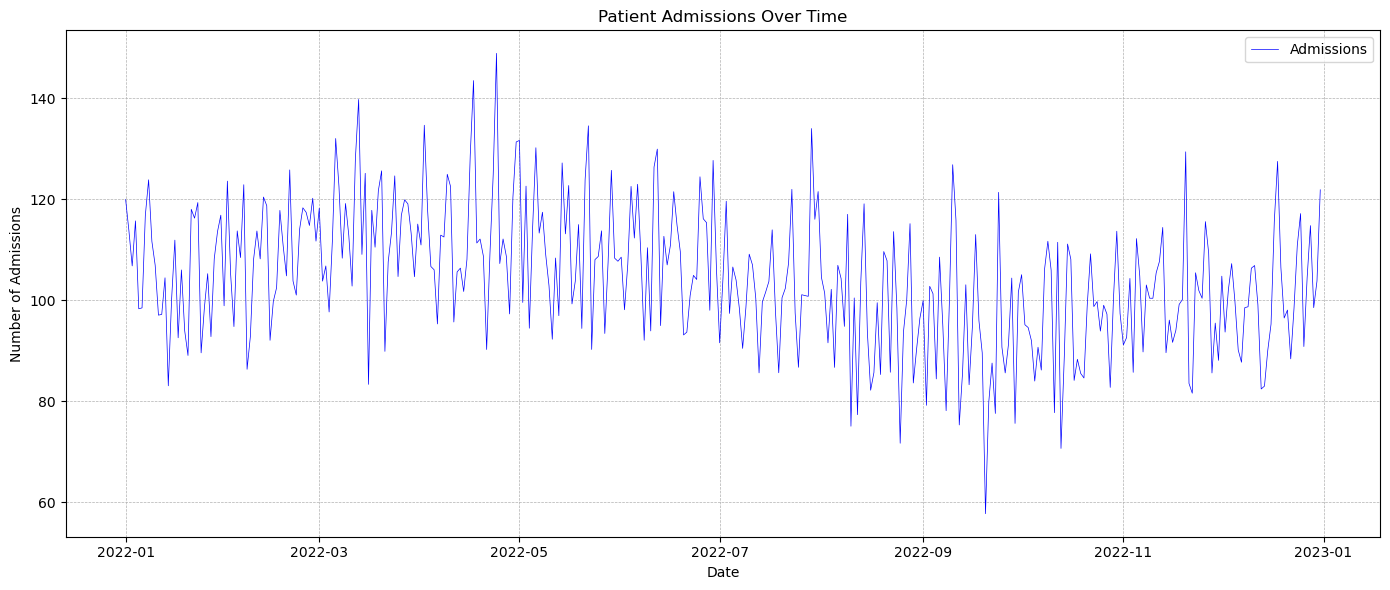

In [2]:
# EDA: Visualize the admissions data
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Admissions'], label='Admissions', color='blue', linewidth=0.5)
plt.title('Patient Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [3]:
# Splitting the data into training and test set
X = df[['Day_of_Week', 'Public_Holiday']]
y = df['Admissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)

# Calculate the Mean Absolute Error (MAE) on the test set
mae = mean_absolute_error(y_test, y_pred)
mae


10.03470470882366

MAE is 10 means test set is approximately 10 patients off the actual number of asmisisons

# Visualize the time series trend

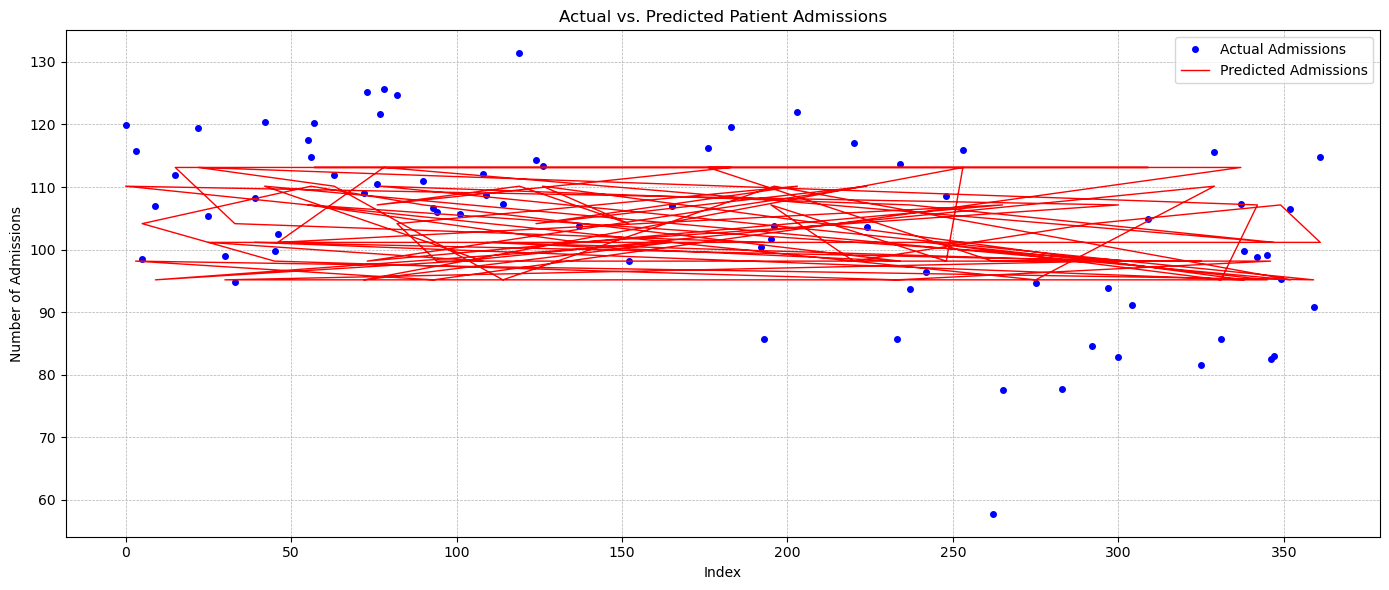

In [4]:
# Visualization of actual vs. predicted admissions
plt.figure(figsize=(14, 6))
plt.plot(X_test.index, y_test, label='Actual Admissions', color='blue', marker='o', linestyle='', markersize=4)
plt.plot(X_test.index, y_pred, label='Predicted Admissions', color='red', linestyle='-', linewidth=1)
plt.title('Actual vs. Predicted Patient Admissions')
plt.xlabel('Index')
plt.ylabel('Number of Admissions')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The simple linear regression model provides a basic predictive capability for patient admissions. However, to capture more complex patterns in the data, we might consider more advanced models such as time-series forecasting models (ARIMA, Prophet)

# Here i'm using simialr data but  performaing Time series Analysis using ARIMA (AutRegressive Integrated Moving Average)

C:\Users\laptop\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


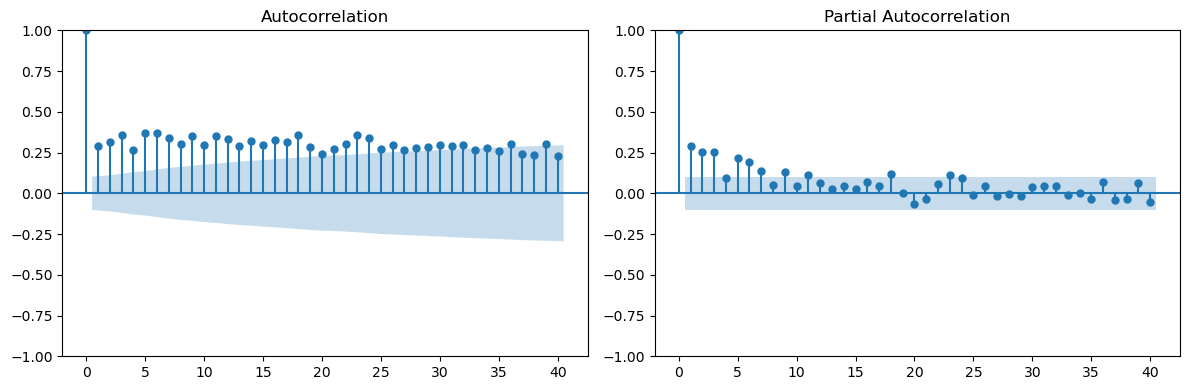

C:\Users\laptop\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(6.92482210136649,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:             Admissions   No. Observations:                  292
 Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1094.042
 Date:                Sat, 14 Oct 2023   AIC                           2196.084
 Time:                        01:38:28   BIC                           2210.791
 Sample:                             0   HQIC                          2201.975
                                 - 292                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const         98.4229      7.946     12.386      0.000      82.848     113.998
 ar.L1          0.9943      0.009    107.828      0

In [10]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Generating the synthetic data again
np.random.seed(42)
date_range = pd.date_range(start='01-01-2022', end='12-31-2022', freq='D')
admissions_mean = 100
noise = np.random.normal(0, 10, len(date_range))
weekend_boost = [15 if day in [5, 6] else 0 for day in date_range]
seasonality = 10 * np.sin(np.linspace(0, 2 * np.pi, len(date_range)))
admissions = admissions_mean + noise + weekend_boost + seasonality
df = pd.DataFrame({
    'Date': date_range,
    'Day_of_Week': date_range.dayofweek,
    'Public_Holiday': [(1 if day.month == 12 and day.day in [25, 31] else 0) for day in date_range],
    'Admissions': admissions
})

# Visualizing ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Admissions'], lags=40, ax=axes[0])
plot_pacf(df['Admissions'], lags=40, ax=axes[1])
plt.tight_layout()
plt.show()

# Splitting the data into training and test set
train_data_arima, test_data_arima = train_test_split(df['Admissions'], test_size=0.2, shuffle=False)

# Training the ARIMA model
arima_model = ARIMA(train_data_arima, order=(1,0,1)).fit()

# Forecasting
predictions_arima = arima_model.forecast(steps=len(test_data_arima))

# Evaluation
mae_arima = mean_absolute_error(test_data_arima, predictions_arima)

mae_arima, arima_model.summary()


C:\Users\laptop\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


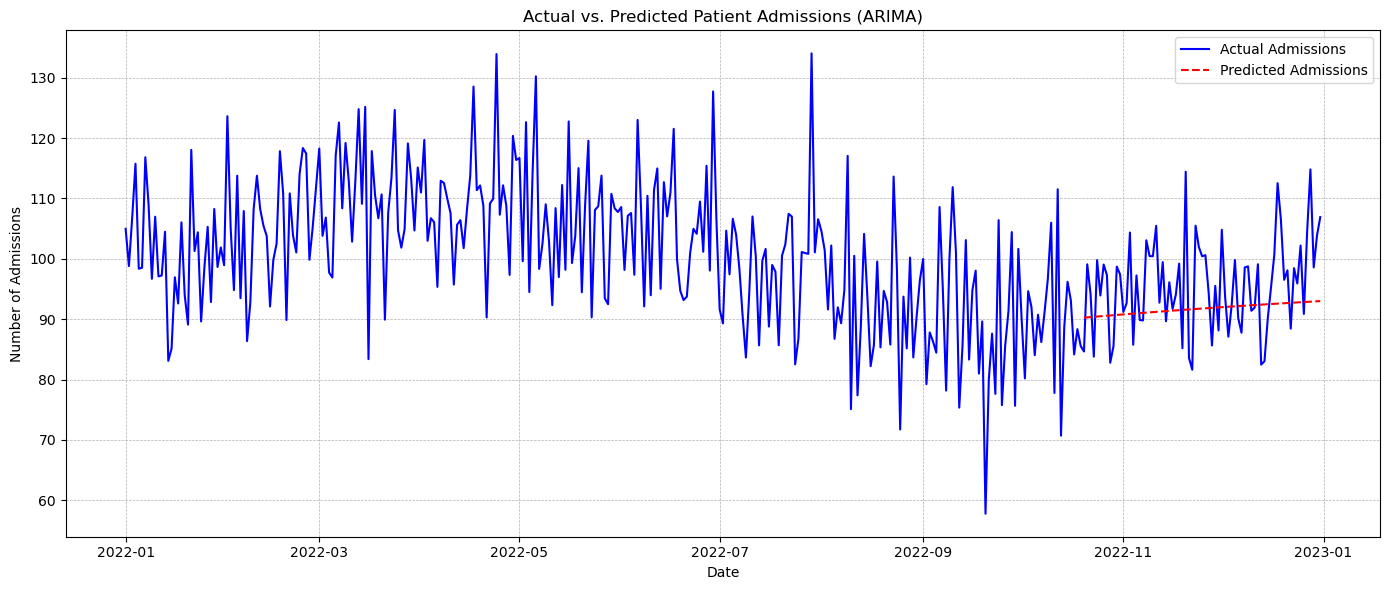

(6.92482210136649,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:             Admissions   No. Observations:                  292
 Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1094.042
 Date:                Sat, 14 Oct 2023   AIC                           2196.084
 Time:                        01:38:47   BIC                           2210.791
 Sample:                             0   HQIC                          2201.975
                                 - 292                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const         98.4229      7.946     12.386      0.000      82.848     113.998
 ar.L1          0.9943      0.009    107.828      0

In [11]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test set
train_data_arima, test_data_arima = train_test_split(df['Admissions'], test_size=0.2, shuffle=False)

# Training the ARIMA model
arima_model = ARIMA(train_data_arima, order=(1,0,1)).fit()

# Forecasting
predictions_arima = arima_model.forecast(steps=len(test_data_arima))

# Evaluation
mae_arima = mean_absolute_error(test_data_arima, predictions_arima)

# Visualization
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Admissions'], label='Actual Admissions', color='blue')
plt.plot(df['Date'][len(train_data_arima):], predictions_arima, label='Predicted Admissions', color='red', linestyle='--')
plt.title('Actual vs. Predicted Patient Admissions (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

mae_arima, arima_model.summary()


This gives an MAE of 6.92.

# generating Mulitple time series models ARIMA, SARIMA, SES, Holts Linear Trend Model, Holt_winters Seasonal Method. Runing seevral models to see what is the best model from evaluation.

ARIMA (AutoRegressive Integrated Moving Average)
SARIMA (Seasonal AutoRegressive Integrated Moving Average)
Simple Exponential Smoothing (SES)
Holt's Linear Trend Model (Double Exponential Smoothing)
Holt-Winters Seasonal Method (Triple Exponential Smoothing)

The Metric im using for comapring my models is Mean Absollute Error.

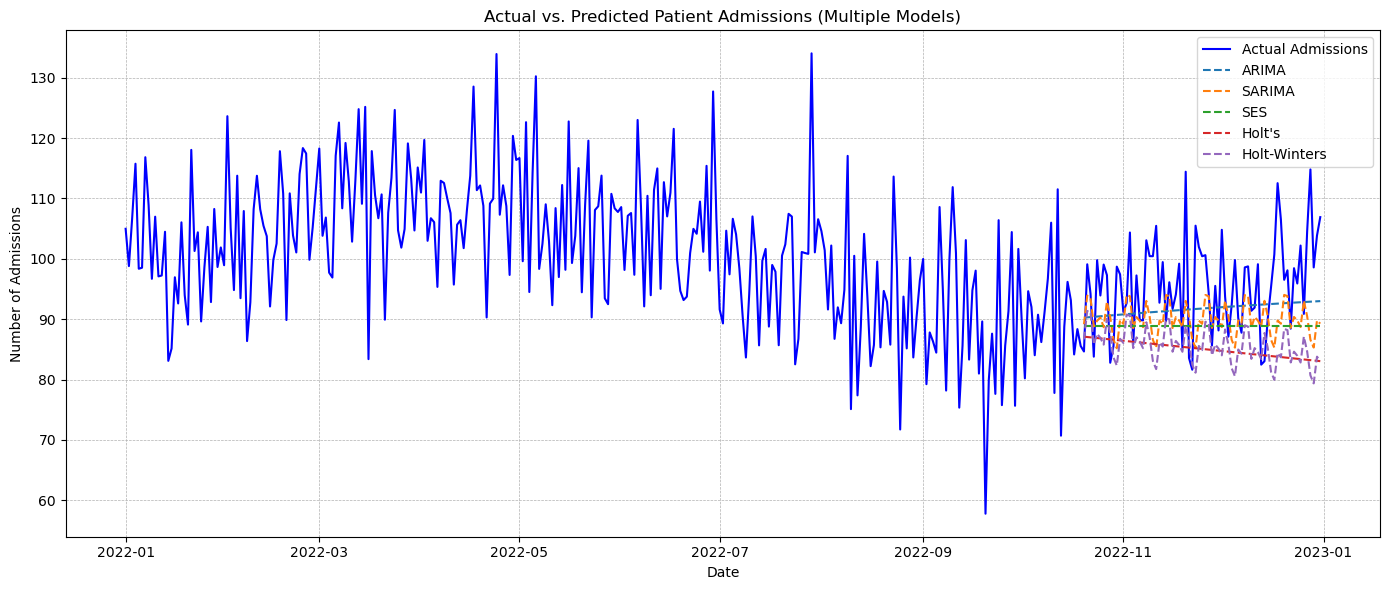

,Model,MAE
0,ARIMA,6.924822
1,SARIMA,7.619643
2,SES,8.374741
4,Holt-Winters,10.530919
3,Holt,11.089726


In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Initialize a dictionary to store the MAE for each model
model_performance = {}

# 1. ARIMA Model (Already created in previous step)
model_performance['ARIMA'] = mae_arima

# 2. SARIMA Model
sarima_model = SARIMAX(train_data_arima, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)).fit()
predictions_sarima = sarima_model.forecast(steps=len(test_data_arima))
mae_sarima = mean_absolute_error(test_data_arima, predictions_sarima)
model_performance['SARIMA'] = mae_sarima

# 3. Simple Exponential Smoothing (SES) Model
ses_model = SimpleExpSmoothing(train_data_arima).fit(smoothing_level=0.2)
predictions_ses = ses_model.forecast(steps=len(test_data_arima))
mae_ses = mean_absolute_error(test_data_arima, predictions_ses)
model_performance['SES'] = mae_ses

# 4. Holt's Linear Trend Model
holt_model = ExponentialSmoothing(train_data_arima, trend='add').fit()
predictions_holt = holt_model.forecast(steps=len(test_data_arima))
mae_holt = mean_absolute_error(test_data_arima, predictions_holt)
model_performance['Holt'] = mae_holt

# 5. Holt-Winters Seasonal Method
holt_winters_model = ExponentialSmoothing(train_data_arima, trend='add', seasonal='add', seasonal_periods=12).fit()
predictions_hw = holt_winters_model.forecast(steps=len(test_data_arima))
mae_hw = mean_absolute_error(test_data_arima, predictions_hw)
model_performance['Holt-Winters'] = mae_hw

# Summary of Model Performance
model_performance_df = pd.DataFrame(list(model_performance.items()), columns=['Model', 'MAE']).sort_values('MAE')

# Visualizing the Predictions
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Admissions'], label='Actual Admissions', color='blue')
plt.plot(df['Date'][len(train_data_arima):], predictions_arima, label='ARIMA', linestyle='--')
plt.plot(df['Date'][len(train_data_arima):], predictions_sarima, label='SARIMA', linestyle='--')
plt.plot(df['Date'][len(train_data_arima):], predictions_ses, label='SES', linestyle='--')
plt.plot(df['Date'][len(train_data_arima):], predictions_holt, label="Holt's", linestyle='--')
plt.plot(df['Date'][len(train_data_arima):], predictions_hw, label='Holt-Winters', linestyle='--')
plt.title('Actual vs. Predicted Patient Admissions (Multiple Models)')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

model_performance_df


Here the blue line represent actiual admissions and dashlines are my predictions from various models, We see Arima has the lowest MAE and thus is best model among the five tested above

# Further i want to perform extensive tuning to imrove model

Step 1: Parameter Tuning:
We will perform a grid search over a range of possible values of the SARIMA parameters 
(p,d,q)(P,D,Q,S) to find the combination that minimizes the AIC.

Step 2: Model Validation:
We'll utilize TimeSeriesSplit for cross-validation. We'll apply a form of time-series cross-validation to validate our model. The TimeSeriesSplit will be used to create a series of training and test splits. We train our model on the training split and evaluate it on the test split, then move forward in time and repeat. This gives us an indication of how well our chosen parameters perform across different time periods in our data

Step 3: Residual Diagnostics:
We'll analyze the residuals from our chosen model to ensure they resemble white noise.Check the residuals for patterns or anomalies, ensuring our model has captured all the relevant information.We will check if residuals are white noise (i.e., normally distributed with a mean of 0) using plots and statistical tests.

Step 4: Forecast Accuracy:
We'll assess the model using different metrics. Use different metrics like MAE, RMSE, or MAPE to gauge how well our model predicts unseen data.

Step 5: Scenario Analysis:
This involves altering input data to simulate different scenarios and observe the model's forecasts.This would involve using our model to predict under various hypothetical conditions, but given the synthetic nature of our data, this step might be limited.


Step 1: performance Tuning

In [1]:
import numpy as np
import pandas as pd
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Re-creating the synthetic data
np.random.seed(42)
date_range = pd.date_range(start='01-01-2022', end='12-31-2022', freq='D')
admissions_mean = 100
noise = np.random.normal(0, 10, len(date_range))
weekend_boost = [15 if day.weekday() in [5, 6] else 0 for day in date_range]
seasonality = 10 * np.sin(np.linspace(0, 2 * np.pi, len(date_range)))
admissions = admissions_mean + noise + weekend_boost + seasonality
df = pd.DataFrame({
    'Date': date_range,
    'Admissions': admissions
})

# Splitting the data into training and test set
train_data_arima, test_data_arima = train_test_split(df['Admissions'], test_size=0.2, shuffle=False)

# Re-defining the parameter grid
p = d = q = P = D = Q = range(0, 2)  # taking two values for simplicity
s = 12  # Monthly seasonality
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

# Re-initializing a dataframe to store the results
results_df = pd.DataFrame(columns=['param', 'param_seasonal', 'AIC'])

# Re-running Grid Search
warnings.filterwarnings("ignore")  # suppress warnings
min_aic = float('inf')
best_param = best_param_seasonal = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_data_arima,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            # Save results
            results_df = results_df.append({'param': param, 'param_seasonal': param_seasonal, 'AIC': results.aic}, ignore_index=True)
            # Check if current model is the best
            if results.aic < min_aic:
                min_aic = results.aic
                best_param = param
                best_param_seasonal = param_seasonal
        except:
            continue

# Re-train the SARIMA model with the best parameters
best_model_sarima = SARIMAX(train_data_arima,
                            order=best_param,
                            seasonal_order=best_param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False).fit()

# Extract the top 5 models from the results
top_results = results_df.sort_values('AIC').head(5)

best_param, best_param_seasonal, min_aic, top_results


((0, 1, 1),
 (0, 1, 1, 12),
 2128.0562365420437,
         param param_seasonal          AIC
 27  (0, 1, 1)  (0, 1, 1, 12)  2128.056237
 59  (1, 1, 1)  (0, 1, 1, 12)  2129.856762
 31  (0, 1, 1)  (1, 1, 1, 12)  2130.027846
 63  (1, 1, 1)  (1, 1, 1, 12)  2133.864377
 11  (0, 0, 1)  (0, 1, 1, 12)  2162.011678)

Step 4: Forecast Accuracy : use metrics like MAE, RMSE, or MAPE to evaluate the forecast accuracy of our model.

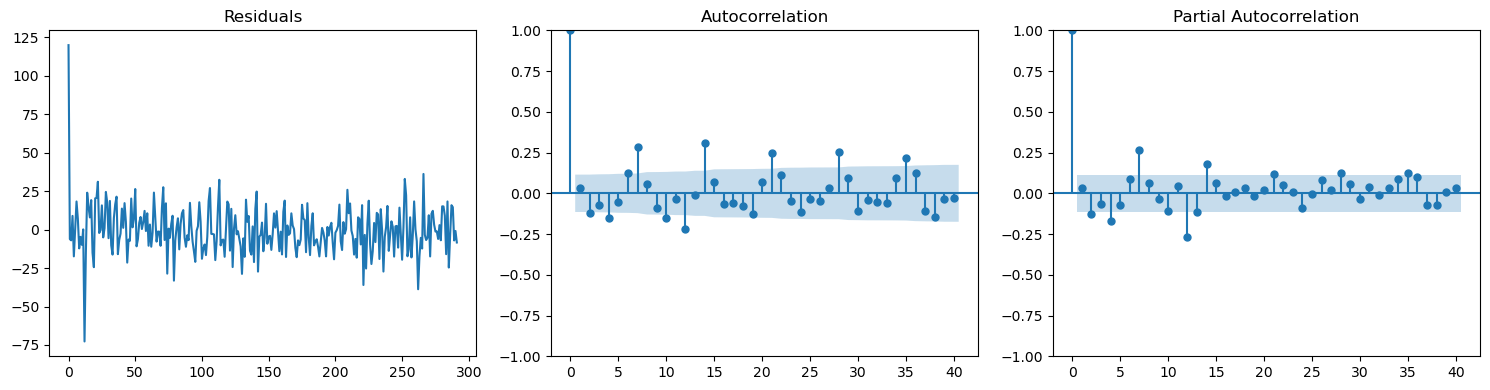

([9.074043155126466,
  13.548737346192913,
  9.655593172175985,
  10.47931125848867,
  11.593432334250688],
 [12.00605891987629,
  15.843109923721881,
  11.402412110060286,
  13.487745162997301,
  14.397833113630911],
 10.742975828009559,
 13.886820622917137,
       lb_stat     lb_pvalue
 10  53.683352  5.557676e-08,
 ShapiroResult(statistic=0.9026962518692017, pvalue=8.894215117009885e-13))

In [3]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import math

# Step 2: Model Validation (TimeSeriesSplit)
tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []
rmse_scores = []

# Performing TimeSeriesSplit and evaluating the model on each split
for train_index, test_index in tscv.split(train_data_arima):
    cv_train, cv_test = train_data_arima.iloc[train_index], train_data_arima.iloc[test_index]
    sarima_cv_model = SARIMAX(cv_train, order=best_param, seasonal_order=best_param_seasonal).fit()
    predictions_cv = sarima_cv_model.forecast(steps=len(cv_test))
    mae_scores.append(mean_absolute_error(cv_test, predictions_cv))
    rmse_scores.append(math.sqrt(mean_squared_error(cv_test, predictions_cv)))

# Step 3: Residual Diagnostics
residuals = pd.Series(best_model_sarima.resid)
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
shapiro_test = shapiro(residuals)

# Visualizing Residuals and ACF, PACF of residuals
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
residuals.plot(ax=axes[0], title='Residuals')
plot_acf(residuals, lags=40, ax=axes[1])
plot_pacf(residuals, lags=40, ax=axes[2])
plt.tight_layout()
plt.show()

# Step 4: Forecast Accuracy
predictions_final_sarima = best_model_sarima.forecast(steps=len(test_data_arima))
mae_final = mean_absolute_error(test_data_arima, predictions_final_sarima)
rmse_final = math.sqrt(mean_squared_error(test_data_arima, predictions_final_sarima))

mae_scores, rmse_scores, mae_final, rmse_final, ljung_box, shapiro_test

